In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
#Loading the dataset
df = pd.read_csv("cardekho.csv")
print("Dataset Info: ", df.info(),"\n\n\n")
#print the first 20 entries
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB
Dataset Info:  None 





,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.5,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.1,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.1,5.0


In [3]:
df.shape #dimension of the dataset 

(8128, 12)

### 1. Data Cleaning and Preprocessing

In [4]:
df.isnull().sum() #to check for missing values

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
#to check if any of the columns contain mixed datatype
mixed_columns = [col for col in df.columns if df[col].apply(type).nunique() > 1]
if mixed_columns:
    print("The following columns have mixed data types:", mixed_columns)
else:
    print("All columns are consistently typed.")

The following columns have mixed data types: ['max_power']


In [7]:
df = df.drop(columns=["name"], errors='ignore')
#for every column other than 'max_power', we replace the missing values by mode
for col in ['mileage(km/ltr/kg)', 'engine', 'seats']:
    df[col].fillna(df[col].median(), inplace=True)

#for max_power we first replace by the most observed value
df['max_power'].fillna(df['max_power'].mode(),inplace = True)
#covert into numeric
df['max_power']=pd.to_numeric(df['max_power'], errors='coerce')
#replace the NaN values obtained after coversion by median
df['max_power'].fillna(df['max_power'].median(), inplace=True)


In [8]:
#rechecking if any of the columns contain mixed datatype
mixed_columns = [col for col in df.columns if df[col].apply(type).nunique() > 1]
if mixed_columns:
    print("The following columns have mixed data types:", mixed_columns)
else:
    print("All columns are consistently typed.")

All columns are consistently typed.


In [9]:
print(df.head())

   year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage(km/ltr/kg)  engine  max_power  seats  
0   First Owner               23.40  1248.0      74.00    5.0  
1  Second Owner               21.14  1498.0     103.52    5.0  
2   Third Owner               17.70  1497.0      78.00    5.0  
3   First Owner               23.00  1396.0      90.00    5.0  
4   First Owner               16.10  1298.0      88.20    5.0  


In [10]:
#encoding - coverting categorical values
encoder = LabelEncoder()
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
encoding_mappings = {}
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
    encoding_mappings[col] = dict(zip(encoder.classes_, range(len(encoder.classes_))))


In [11]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Then, fill missing values as before
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)
#rechecking if any of the columns still has missing values or not
print(df.isnull().sum())

year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


In [12]:
print("\n Statistical Summary : \n", df.describe())


 Statistical Summary : 
               year  selling_price     km_driven         fuel  seller_type  \
count  6926.000000   6.926000e+03  6.926000e+03  6926.000000  6926.000000   
mean   2013.420300   5.172707e+05  7.399568e+04     1.885937     0.905573   
std       4.078286   5.197670e+05  5.835810e+04     1.002948     0.305484   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000     0.000000   
25%    2011.000000   2.500000e+05  4.000000e+04     1.000000     1.000000   
50%    2014.000000   4.000000e+05  7.000000e+04     1.000000     1.000000   
75%    2017.000000   6.335000e+05  1.000000e+05     3.000000     1.000000   
max    2020.000000   1.000000e+07  2.360457e+06     3.000000     2.000000   

       transmission        owner  mileage(km/ltr/kg)       engine  \
count   6926.000000  6926.000000         6926.000000  6926.000000   
mean       0.915680     0.906151           19.464550  1425.398787   
std        0.277887     1.260279            3.987878   487.026967   
min 

### 2. Data Visualization

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

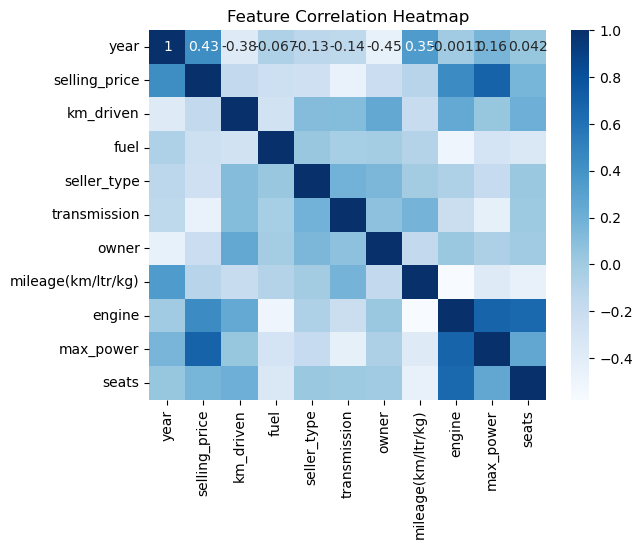

In [14]:
#heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


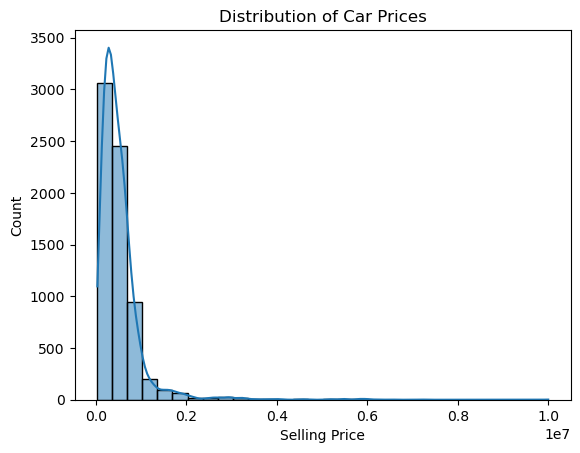

In [15]:
#Histogram
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Selling Price")
plt.show()

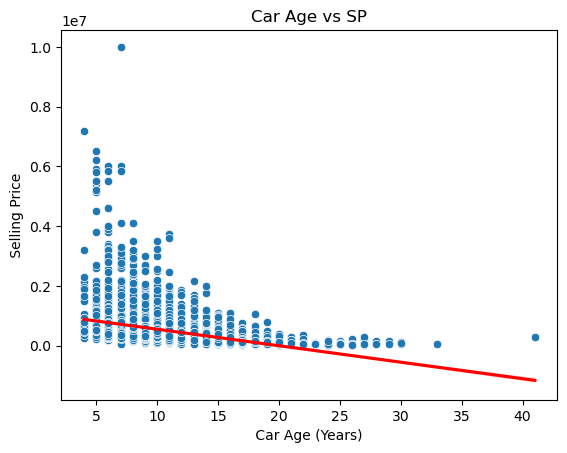

In [16]:
#scatter plot
df['car_age'] = 2024 - df['year']
sns.scatterplot(x=df['car_age'], y=df['selling_price'])
sns.regplot(x=df['car_age'], y=df['selling_price'], scatter=False, color='red')
plt.title("Car Age vs SP")
plt.xlabel(" Car Age (Years) ")
plt.ylabel(" Selling Price ")
plt.show()

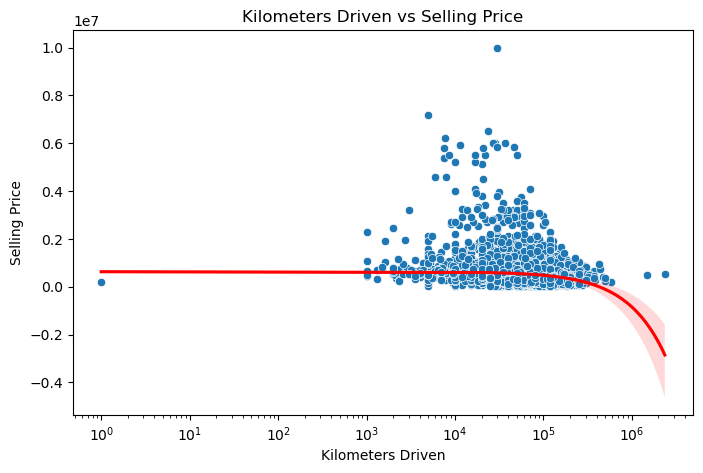

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
sns.regplot(x=df['km_driven'], y=df['selling_price'], scatter=False, color='red')
plt.title("Kilometers Driven vs Selling Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.xscale('log')  # Log scale for better visualization
plt.show()


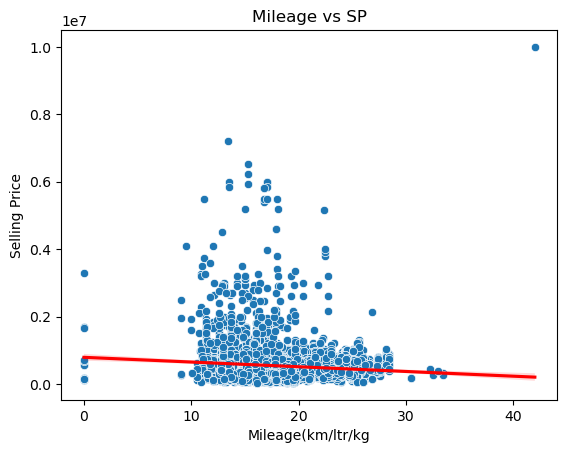

In [18]:
sns.scatterplot(x=df['mileage(km/ltr/kg)'], y=df['selling_price'])
sns.regplot(x=df['mileage(km/ltr/kg)'], y=df['selling_price'], scatter=False, color='red')
plt.title("Mileage vs SP")
plt.xlabel("Mileage(km/ltr/kg")
plt.ylabel("Selling Price")
plt.show()

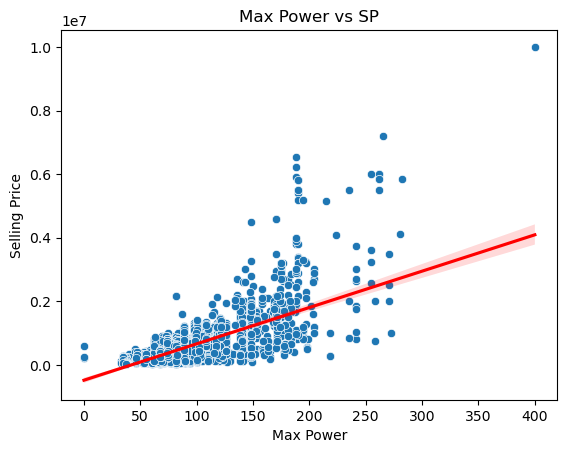

In [19]:
sns.scatterplot(x=df['max_power'], y=df['selling_price'])
sns.regplot(x=df['max_power'], y=df['selling_price'], scatter=False, color='red')
plt.title("Max Power vs SP")
plt.xlabel("Max Power")
plt.ylabel("Selling Price")
plt.show()

{0: 'CNG', 1: 'Diesel', 2: 'LPG', 3: 'Petrol'}


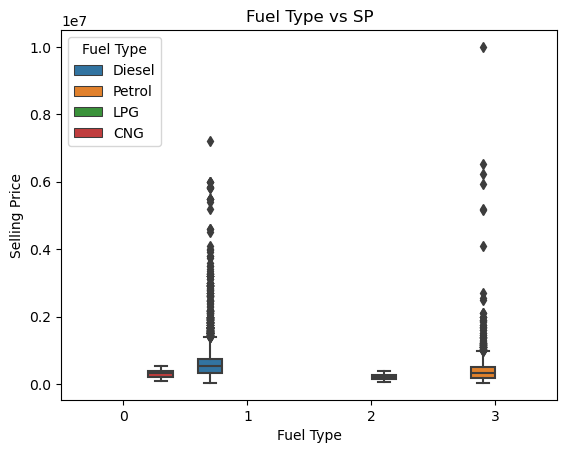

In [21]:
#boxplot
fuel_labels = {v: k for k, v in encoding_mappings['fuel'].items()}
print(fuel_labels)
# Convert fuel column to categorical if it's numerical 
df['fuel1'] = df['fuel'].map(fuel_labels)
sns.boxplot(x=df['fuel'], y=df['selling_price'], hue=df['fuel1'])
plt.title("Fuel Type vs SP")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.legend(title="Fuel Type") 
plt.show()

{0: 'Automatic', 1: 'Manual'}


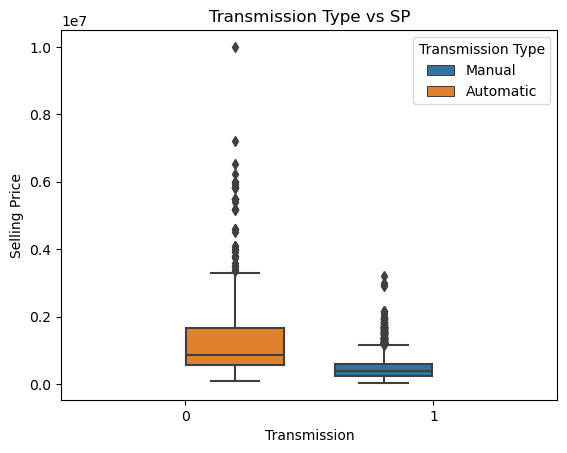

In [22]:
transmission_labels = {v: k for k, v in encoding_mappings['transmission'].items()}
print(transmission_labels)
# Convert transmission column to categorical if it's numerical (0 and 1)
df['transmission1'] = df['transmission'].map(transmission_labels)

sns.boxplot(x=df['transmission'], y=df['selling_price'], hue=df['transmission1'])
plt.title("Transmission Type vs SP")
plt.xlabel("Transmission")
plt.ylabel("Selling Price")
plt.legend(title="Transmission Type") 
plt.show()


{0: 'First Owner', 1: 'Fourth & Above Owner', 2: 'Second Owner', 3: 'Test Drive Car', 4: 'Third Owner'}


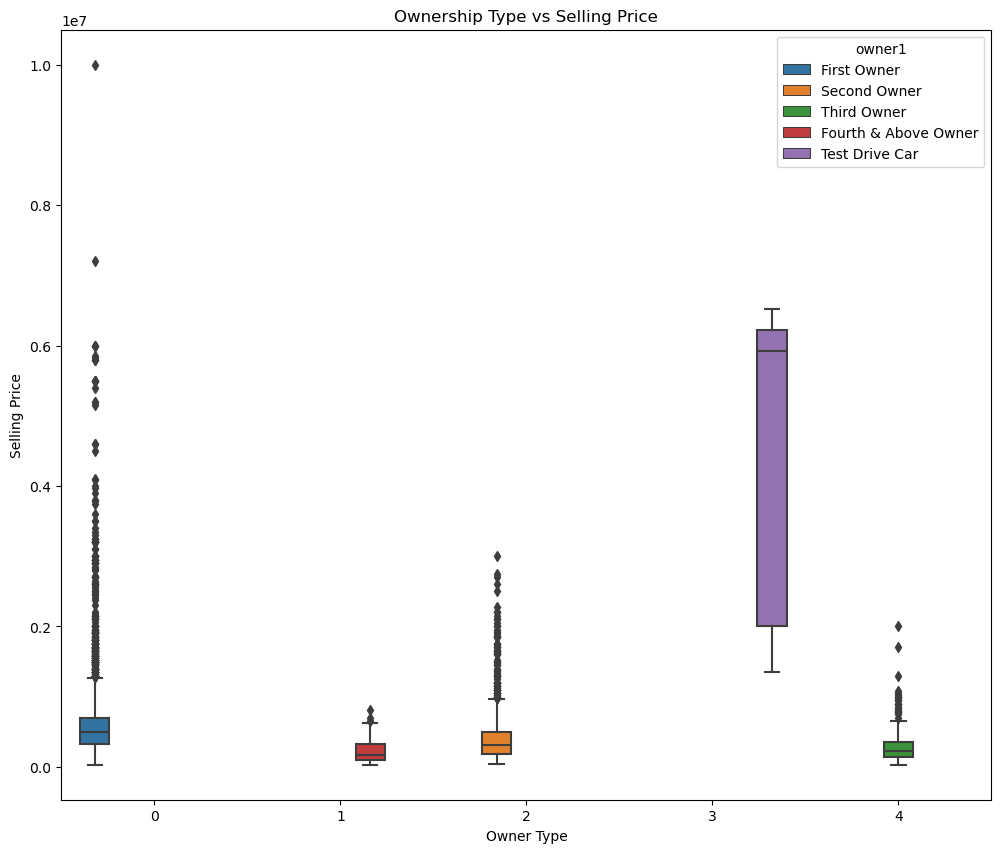

In [23]:
owner_labels = {v: k for k, v in encoding_mappings['owner'].items()}
print(owner_labels)
df['owner1'] = df['owner'].map(owner_labels)
plt.figure(figsize=(12, 10))
sns.boxplot(x=df['owner'], y=df['selling_price'], hue=df['owner1'])
plt.title("Ownership Type vs Selling Price")
plt.xlabel("Owner Type")
plt.xticks()
plt.ylabel("Selling Price")
plt.show()